# Data preprocessing




In [21]:
import pandas as pd
import shutil
import random
from DicomRTTool.ReaderWriter import DicomReaderWriter, ROIAssociationClass
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, ConcatDataset, TensorDataset


## Split to positive/negative
1. extract positive pneumonitis cases into pneumonitis_positive folder
2. extract proportional negative pneumonitis cases into pneumonitis_negative folder (30/70 of positive/negative)

In [12]:
large_path = '/home/lam3654/MSAI_pneumonitis/data/DataUsedForAnalysis'
df = pd.read_csv(r'/home/lam3654/MSAI_pneumonitis/toxicity_anon.csv')

# Select values from one column based on the value of another
pos_large_value = df.loc[df['pneumonitis'] == 1, 'anon_id']




# Iterate over the values
for value in pos_large_value:
    print(value)
    source_folder = '/home/lam3654/MSAI_pneumonitis/data/DataUsedForAnalysis/{}/'.format(value)
    destination_folder = '/home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/{}/'.format(value)

    # Copy the entire folder and its contents recursively
    shutil.copytree(source_folder, destination_folder)


P0356
P0535
P0560
P0567
P0636
P0663
P0670
P0054
P0149
P0320
P0468
P0472
P0500
P0581
P0668
P0695
P0704
P0751
P0753
P0784
P0862
P0874
P0887
P0889
P0962
P0971
P0985
P1012
P1016
P1020
P1060
P1064
P1069
P1084
P1087
P1093
P1097
P1133
P1141
P1159
P1161
P1163
P1181
P1192
P1199
P1203
P1224
P1316


In [19]:
neg_large_value = df.loc[df['pneumonitis'] == 0, 'anon_id']
neg_large_value = list(neg_large_value)
# shuffled_df = neg_large_value.sample(frac=1)
random.shuffle(neg_large_value)

count = 0
for value in neg_large_value:
    if count < 114:
        print(value)
        source_folder = '/home/lam3654/MSAI_pneumonitis/data/DataUsedForAnalysis/{}/'.format(value)
        destination_folder = '/home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/{}/'.format(value)
        
        # Copy the entire folder and its contents recursively
        shutil.copytree(source_folder, destination_folder)
        count += 1

P1177
P0859
P0554
P0506
P1107
P0715
P0842
P1080
P1065
P1270
P1121
P0364
P0155
P0616
P0260
P1210
P0444
P0612
P0113
P1262
P1183
P1182
P1019
P1031
P0827
P1308
P0640
P1073
P0393
P1196
P0047
P0948
P0241
P1266
P1117
P1050
P0634
P0257
P0830
P1078
P0315
P0983
P0820
P1290
P1307
P0959
P1238
P0681
P0643
P1253
P0576
P0745
P1249
P1287
P0885
P1108
P0621
P1292
P0202
P0589
P1046
P0865
P0139
P0198
P1190
P1277
P0993
P0262
P1072
P1059
P0835
P0517
P0102
P0964
P0138
P1104
P1251
P0123
P1118
P1070
P1123
P0672
P0504
P0570
P0773
P1055
P0573
P1132
P0312
P0158
P0450
P1048
P1036
P0992
P0968
P1037
P0805
P1269
P0741
P1254
P0222
P0003
P0657
P0677
P0877
P0140
P1122
P0742
P0029
P0571
P0834
P1230
P0210
P1106


In [10]:
df = pd.read_excel(r'/home/lam3654/MSAI_pneumonitis/label.xlsx')

# Select values from one column based on the value of another
pos_small_value = df.loc[df['pneumonitis'] == 1, 'anon_id']




# Iterate over the values
for value in pos_small_value:
    print(value)
    source_folder = '/home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/{}/'.format(value)
    destination_folder = '/home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/{}/'.format(value)
    if os.path.exists(source_folder):
        print('source folder found: ', source_folder)
        # Copy the entire folder and its contents recursively
        shutil.copytree(source_folder, destination_folder)
        print(value, 'added')

NU_0008A
NU_0008B
NU_0016B
NU_0017A
NU_0035
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0035/
NU_0035 added
NU_0050A
NU_0062
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0062/
NU_0062 added
NU_0063
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0063/
NU_0063 added
NU_0072
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0072/
NU_0072 added
NU_0109A
NU_0129A
NU_0152
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0152/
NU_0152 added
NU_0163
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0163/
NU_0163 added
NU_0190
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0190/
NU_0190 added
NU_0196
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0196/
NU_0196 added
NU_0199
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_019

In [4]:
df = pd.read_excel(r'/home/lam3654/MSAI_pneumonitis/label.xlsx')
# Select values from one column based on the value of another
neg_small_value = df.loc[df['pneumonitis'] == 0, 'anon_id']
neg_small_value = list(neg_small_value)
random.shuffle(neg_small_value)



count = 0
# Iterate over the values
for value in neg_small_value:
    print(value)
    source_folder = '/home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/{}/'.format(value)
    destination_folder = '/home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/{}/'.format(value)
    if os.path.exists(source_folder):
        if count<23:
            print('source folder found: ', source_folder)
            # Copy the entire folder and its contents recursively
            shutil.copytree(source_folder, destination_folder)
            print(value, 'added')
            count +=1 

NU_0179A
NU_0020
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0020/
NU_0020 added
NU_0050C
NU_0262
NU_0149
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0149/
NU_0149 added
NU_0231A
NU_0153B
NU_0279
NU_0153A
NU_0025A
NU_0292
NU_0179B
NU_0123
NU_0261
NU_0235
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0235/
NU_0235 added
NU_0033
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0033/
NU_0033 added
NU_0018
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0018/
NU_0018 added
NU_0134
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0134/
NU_0134 added
NU_0097
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0097/
NU_0097 added
NU_0028
source folder found:  /home/lam3654/MSAI_pneumonitis/data/combined_BATCHES/NU_0028/
NU_0028 added
NU_0191A
NU_0294
NU_0269B
NU_0117B
NU_0286
NU_010

## Train/Dev/Test split

In [6]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 41.7 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 7.1 MB/s eta 0:00:00m eta 0:00:01


In [11]:


positive_folder = r'/home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive'
negative_folder = r'/home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative'

# Load the data and labels
positive_data = [os.path.join(positive_folder, filename) for filename in os.listdir(positive_folder)]
negative_data = [os.path.join(negative_folder, filename) for filename in os.listdir(negative_folder)]
data = positive_data + negative_data
labels = [1] * len(positive_data) + [0] * len(negative_data)

# Shuffle the data and labels together
combined_data = list(zip(data, labels))
random.shuffle(combined_data)
data, labels = zip(*combined_data)

# Determine the sizes of each set
train_size = int(0.7 * len(data))
dev_size = int(0.15 * len(data))

# Split the data into train, dev, and test sets
train_data, remaining_data, train_labels, remaining_labels = train_test_split(data, labels, train_size=train_size, stratify=labels)
dev_data, test_data, dev_labels, test_labels = train_test_split(remaining_data, remaining_labels, train_size=dev_size/(len(data)-train_size), stratify=remaining_labels)

# Print the sizes of each set
print(f"Train set size: {len(train_data)}")
print(f"Dev set size: {len(dev_data)}")
print(f"Test set size: {len(test_data)}")



Train set size: 136
Dev set size: 29
Test set size: 30


## Confirm files are correct

In [7]:
def display_slices(image, mask, skip=1):
    """
    Displays a series of slices in z-direction that contains the segmented regions of interest.
    Ensures all contours are displayed in consistent and different colors.
        Parameters:
            image (array-like): Numpy array of image.
            mask (array-like): Numpy array of mask.
            skip (int): Only print every nth slice, i.e. if 3 only print every 3rd slice, default 1.
        Returns:
            None (series of in-line plots).
    """

    slice_locations = np.unique(np.where(mask != 0)[0]) # get indexes for where there is a contour present 
    slice_start = slice_locations[0] # first slice of contour 
    slice_end = slice_locations[len(slice_locations)-1] # last slice of contour
    
    counter = 1
    
    for img_arr, contour_arr in zip(image[slice_start:slice_end+1], mask[slice_start:slice_end+1]): # plot the slices with contours overlayed ontop
        if counter % skip == 0: # if current slice is divisible by desired skip amount 
            masked_contour_arr = np.ma.masked_where(contour_arr == 0, contour_arr)
            plt.imshow(img_arr, cmap='gray', interpolation='none')
            plt.imshow(masked_contour_arr, cmap='cool', interpolation='none', alpha=0.5, vmin = 1, vmax = np.amax(mask)) # vmax is set as total number of contours so same colors can be displayed for each slice
            plt.show()
        counter += 1

In [11]:
Dicom_path = r'/home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/'
Dicom_reader = DicomReaderWriter(description='Examples', arg_max=True)
Dicom_reader.walk_through_folders(Dicom_path) # This will parse through all DICOM present in the folder and subfolders


Loading through DICOM files:   0%|                                                                                                           | 0/1 [00:00<?, ?it/s]

Loading from /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/


Loading through DICOM files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:31<00:00, 31.32s/it]

Compiling dictionaries together...
Index 0, description 3mm Chest  3.0  B35s at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/
Index 1, description 3mm Chest  3.0  B35s at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/
Index 2, description Chest 3mm  3.0  B35f at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/
Index 3, description 3mm Chest  3.0  B35s at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/
Index 4, description Chest   3.0  B35s  at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/
Index 5, description 4D CT/OncoBody at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0003/
Index 6, description None at None
7 unique series IDs were found. Default is index 0, to change use set_index(index)


In [12]:
all_rois = Dicom_reader.return_rois(print_rois=True) # Return a list of all rois present

The following ROIs were found
gtv free
lt lung
rt lung
cord
whole lung
esophagus
gtv in
trachea
heart
ipsi bp
gtv ex
pbt
itv
outer contour
ptv
enlarged ptv
wall of enlarged ptv
esophagus wall
airway
airway wall


In [20]:
Contour_names = ['whole lung']
Dicom_reader.set_contour_names_and_associations(contour_names=Contour_names)

Lacking ['whole lung'] in index 0, location /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0715. Found []
Lacking ['whole lung'] in index 3, location /home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/P0962. Found ['isocenter', 'rt lung', 'lt lung', 'heart', 'cord', 'esophagus', 'trachea', 'pbt', 'ipsi bp', 'gtv free', 'gtv in', 'gtv ex', 'contra bp', 'great vessels', 'itv', 'ptv', 'table tx', 'combined lung', 'ring', '5000 (reviewed and approved)']
Lacking ['whole lung'] in index 5, location /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/NU_0149/2010-12__Studies/NU.0149_NU.0149_CT_2010-12-06_111436_SBRT.lung.planning_NU.0149_n216__00000. Found ['lung_r', 'lung_l', 'gtv', 'itv', 'ptv', 'lungs', 'lungs-gtv', 'lungs-itv', 'lungs-ptv', 'l lung-gtv', 'l lung-itv', 'l lung-ptv', 'gtv+2cm', 'itv+2cm', 'ptv+2cm']
Contour names or associations changed, resetting mask


In [8]:
indexes = Dicom_reader.which_indexes_have_all_rois()

The following indexes have all ROIs present
Index 6, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/P1181
Index 13, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0312
Index 19, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0444
Index 26, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P1104
Index 31, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/P1084
Index 43, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/P1016
Index 55, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0948
Index 65, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_positive/NU_0062/2012-09__Studies/NU.0062_NU.0062_CT_2012-09-23_092750_SBRT.Lung.Plan_NU.0062_n175__00000
Index 73, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P1037
Index 83, located at /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/P0745
Index 106, located at /hom

In [9]:
pt_indx = indexes[-1]
Dicom_reader.set_index(pt_indx)  # This index has all the structures, corresponds to pre-RT T1-w image for patient 011
Dicom_reader.get_images_and_mask()  # Load up the images and mask for the requested index

Loading images for NU_0119  at 
 /home/lam3654/MSAI_pneumonitis/data/pneumonitis_negative/NU_0119/2012-07__Studies/NU.0119_NU.0119_CT_2012-07-29_091844_SBRT.planning..bellows_NU.0119_n203__00000

Erasing any previous mask as we load a new new image set


In [10]:
image = Dicom_reader.ArrayDicom # image array
mask = Dicom_reader.mask # mask array

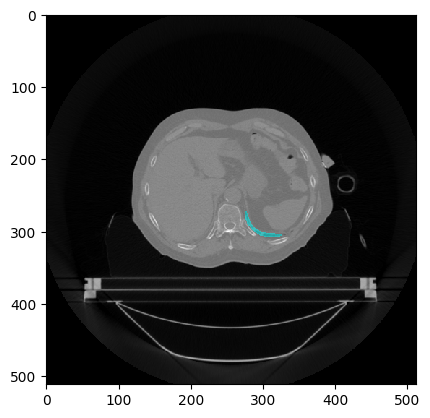

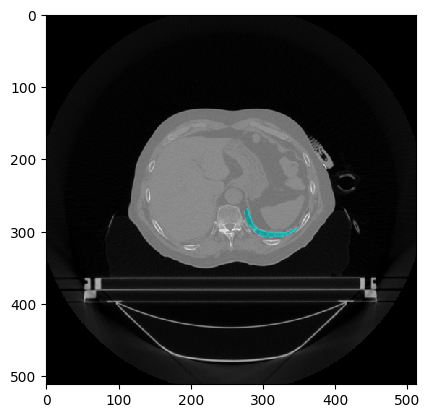

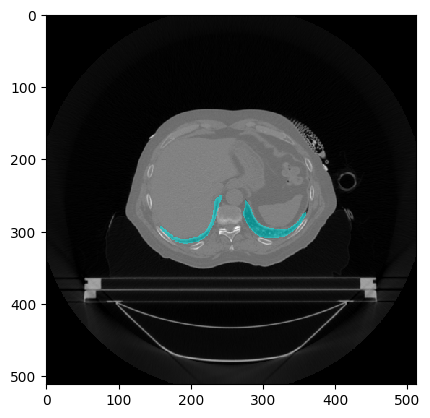

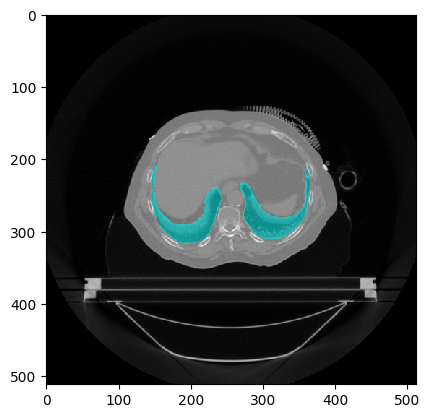

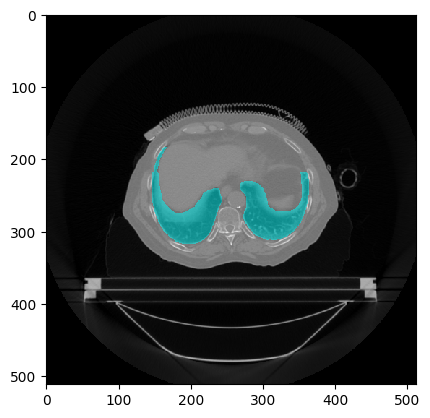

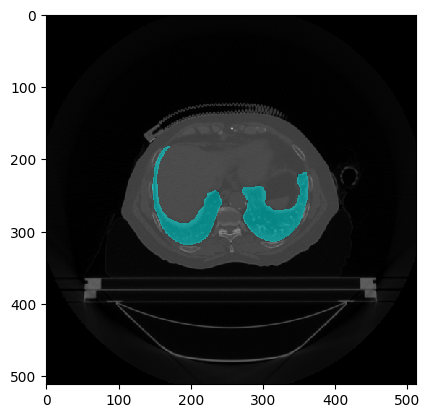

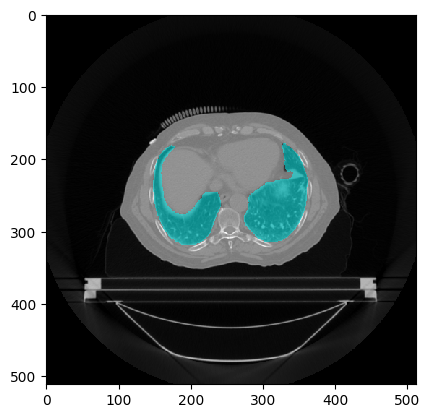

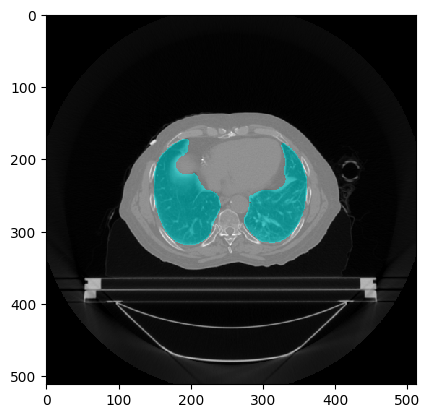

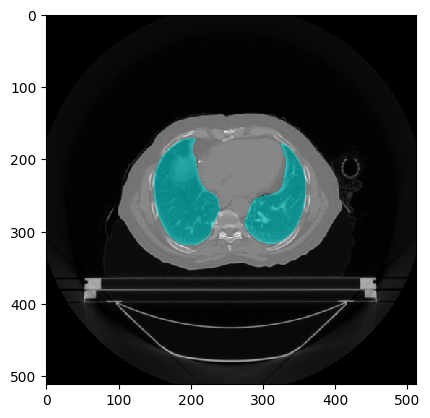

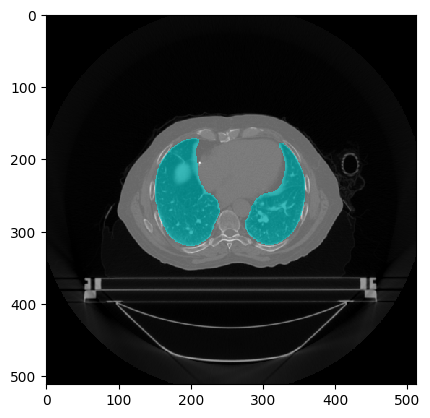

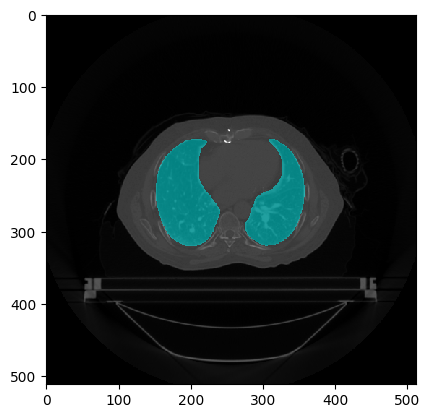

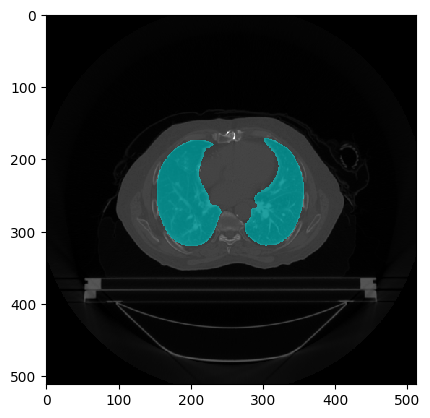

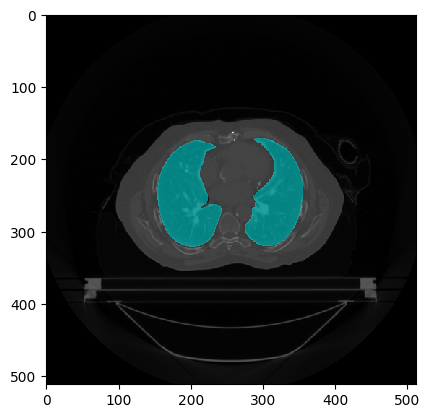

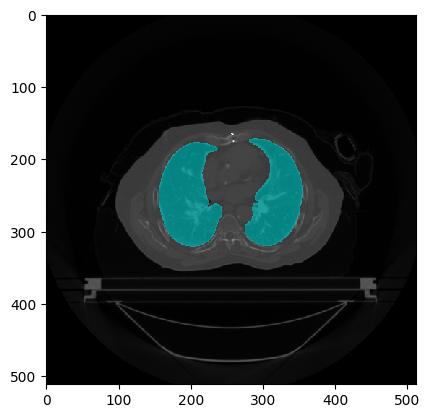

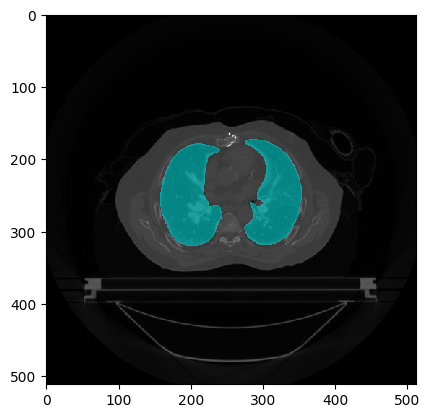

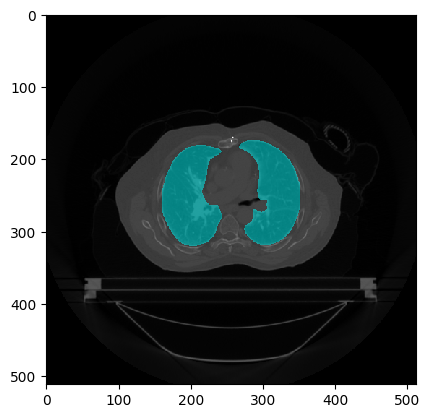

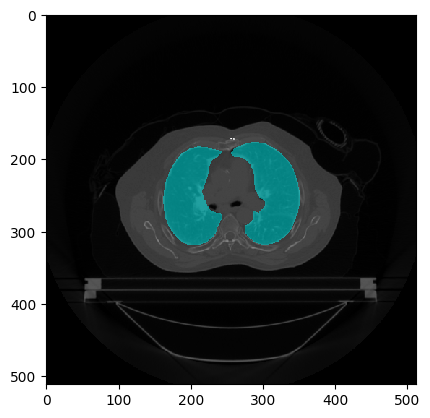

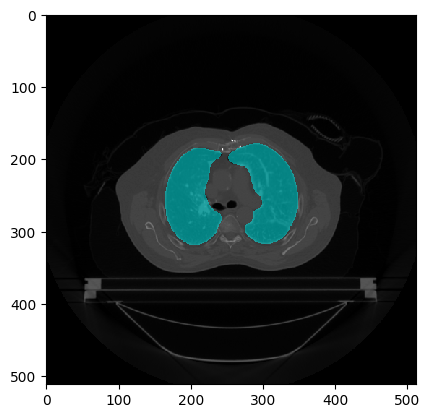

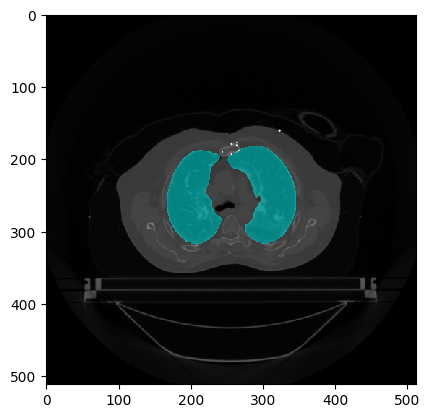

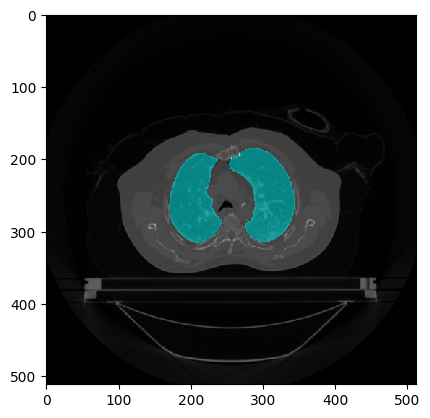

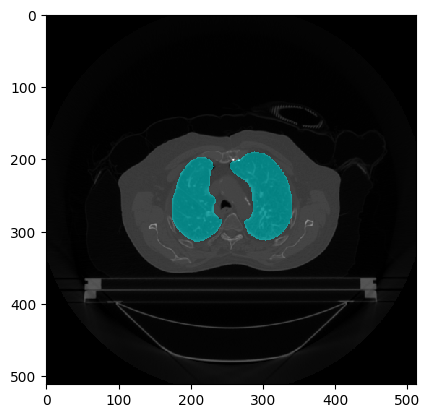

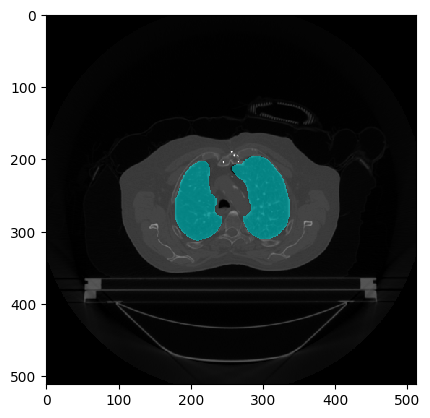

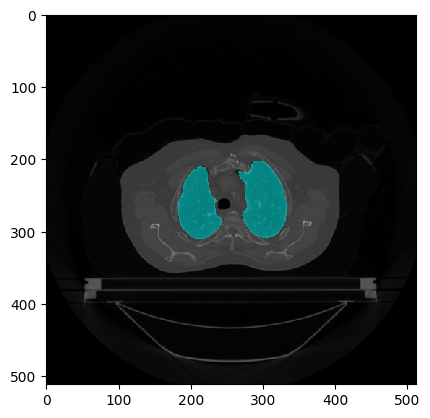

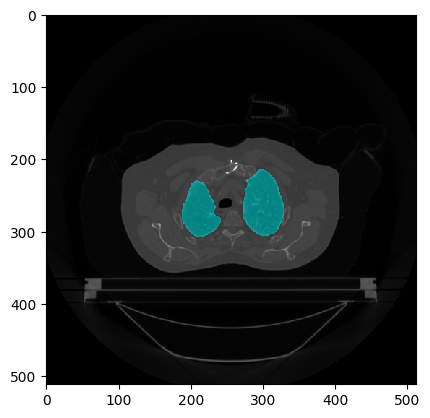

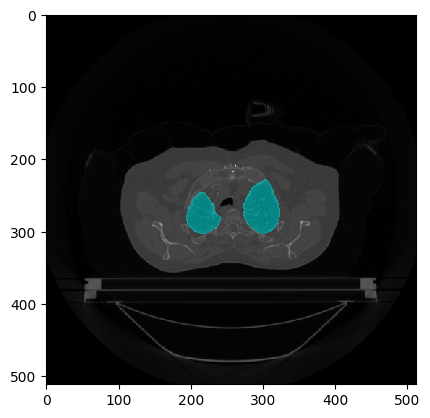

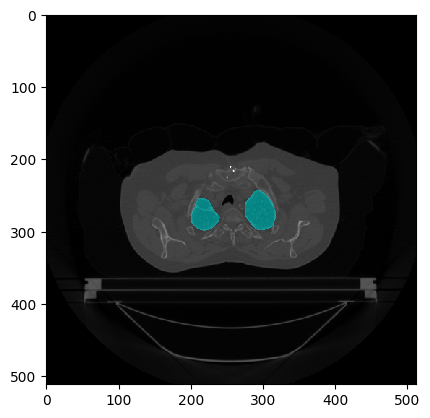

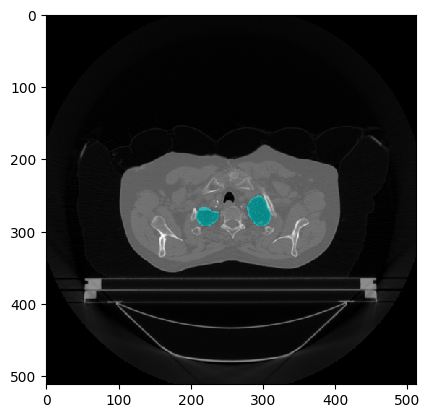

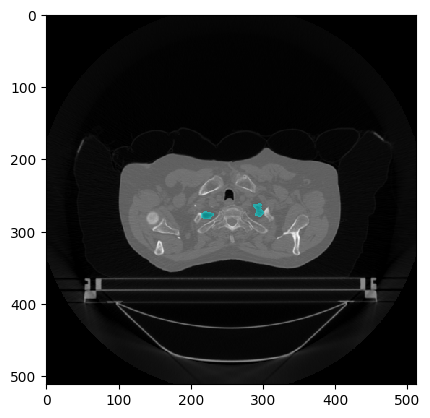

In [11]:
n_slices_skip = 4
display_slices(image, mask, skip = n_slices_skip) # visualize that our segmentations were succesfully convereted

## Create Dataset

In [ ]:
class CTMaskDataset(Dataset):
    def __init__(self, ct_path, label):
        self.ct_path = ct_path
        self.label = label

        self.Dicom_reader = DicomReaderWriter(description='Examples', arg_max=True)
        self.Dicom_reader.walk_through_folders(ct_path)

        Contour_names = ['lung'] # Define what rois you want
        associations = [ROIAssociationClass('lung', ['lungs', 'whole lung'])] # Any list of roi associations
        self.Dicom_reader.set_contour_names_and_associations(contour_names=Contour_names, associations=associations)

        self.indexes = self.Dicom_reader.which_indexes_have_all_rois()

    def __len__(self):
        return len(self.indexes)

    def __getitem__(self, idx):

        pt_indx = self.indexes[idx]
        Dicom_reader.set_index(pt_indx)  # This index has all the structures, corresponds to pre-RT T1-w image for patient 011
        Dicom_reader.get_images_and_mask()  # Load up the images and mask for the requested index

        image = Dicom_reader.ArrayDicom # image array
        mask = Dicom_reader.mask # mask array

        return image, mask, self.label

In [ ]:

dataset = CTMaskDataset(train_data[0], train_labels[0])
idx = 1
while idx < len(train_data):
    next_dataset = CTMaskDataset(train_data[idx], train_labels[idx])
    dataset = ConcatDataset([dataset, next_dataset])
    idx += 1

data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

## Define model structure

In [ ]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 128 * 128, 512)
        self.fc2 = nn.Linear(512, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 128 * 128)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Train model

In [22]:
# Check if a GPU is available and if not, default to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Initialize the model, loss function, and optimizer
model = CNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Now you can use the model in your training loop
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, masks, labels) in enumerate(data_loader):
        # Move data and labels to device
        inputs, labels = inputs.to(device), labels.to(device)
        mask = masks.to(device)
        inputs = masks.unsqueeze(1).float()
        optimizer.zero_grad()
        outputs = model(inputs).float()
        labels = labels.long()
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {running_loss / len(data_loader)}")
# Save the model
model_save_path = "./model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Training on cpu


NameError: name 'CNNClassifier' is not defined

## Get correct masks

side information is given in the 'side' column. 
- RUL - right upper lobe
- RLL - right lower lobe
- LUL - left upper lobe
- LLL - left lower lobe